In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

# Set a seed for reproducibility
np.random.seed(42)



def generate_diamond_border(n, dtype = 'int'):
    # Create an n x n matrix filled with zeros
    diamond_border = np.zeros((n, n))

    # Determine the size of the diamond
    diamond_size = n // 2

    for i in range(diamond_size):
        # Top part of the diamond
        diamond_border[i, diamond_size - i] = 1
        diamond_border[i, diamond_size + i] = 1

        # Bottom part of the diamond
        diamond_border[n - i - 1, diamond_size - i] = 1
        diamond_border[n - i - 1, diamond_size + i] = 1
    if n % 2 == 1:
        diamond_border[diamond_size, 0] = 1
        diamond_border[diamond_size, -1] = 1
    if dtype == 'bool':
        return diamond_border.astype(bool)
    return diamond_border

# Generate the diamond border and noise
n = 21
diamond_border = generate_diamond_border(n)

def generate_diamond_sequence(n):
    # Create the diamond grid using the generate_diamond_border function
    diamond_grid = generate_diamond_border(n)

    # Flatten the grid into a vector
    diamond_vector = diamond_grid.flatten()

    # Convert the vector into a binary sequence string
    diamond_sequence = ''.join(map(str, diamond_vector.astype(int)))

    return diamond_sequence

def plot_sequence(sequence):
    diamond_grid = generate_diamond_border(21)
    # Convert sequence from string to list of integers
    vector = np.array(list(map(int, sequence)))

    # Reshape vector into n x n grid
    grid = np.reshape(vector, (n, n))

    color_grid = np.where((grid == 1) & (diamond_grid == 1), 2, grid)

    # Create a colormap: 0 (white), 1 (black), 2 (red)
    colors = [(1, 1, 1), (0, 0, 0), (1, 0, 0)]
    cmap = plt.matplotlib.colors.ListedColormap(colors)

    # Create a figure and a set of subplots
    fig, ax = plt.subplots()

    # Display data as an image
    ax.imshow(color_grid, cmap=cmap)

    # Draw gridlines
    ax.grid(True, which='both', color='black', linewidth=1)

    # Configure gridlines
    ax.set_xticks(np.arange(-0.5, n, 1), minor=False)
    ax.set_yticks(np.arange(-0.5, n, 1), minor=False)
    
    # Remove labels from gridlines
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    # Display the plot
    plt.show()

import random

# Initialize a dictionary with random values between 0 and 0.5 for each position


def fitness(vector):
    random_values = {i: random.uniform(0, 1) for i in range(n*n)}
    if isinstance(vector, str):
        vector = np.array(list(map(int, vector)))

    # Reshape vector into n x n grid
    grid = np.reshape(vector, (n, n))

    # Compute fitness by summing pixel values
    fitness_values = np.zeros_like(grid, dtype=float)
    for i in range(n):
        for j in range(n):
            if grid[i, j] == 1:
                fitness_values[i, j] = diamond_border[i, j]
            else:
                fitness_values[i, j] = random_values[i*n + j]

    fitness_base = np.sum(fitness_values)

    return fitness_base


In [2]:
smoothed_candidates_df = pd.read_csv('/home/gridsan/akirjner/protein_design/GGS-private/ckpt/Diamond/mutations_0/percentile_0.0_1.0/smoothed/run_06D_08M_2023Y_00h_07m_13s/samples/run_2023-08-06_10-22/seed_1.csv')
unsmoothed_candidates_df = pd.read_csv('/home/gridsan/akirjner/protein_design/GGS-private/ckpt//Diamond/mutations_0/percentile_0.0_1.0/unsmoothed/run_05D_08M_2023Y_21h_41m_02s/samples/run_2023-08-05_22-33/seed_1.csv')

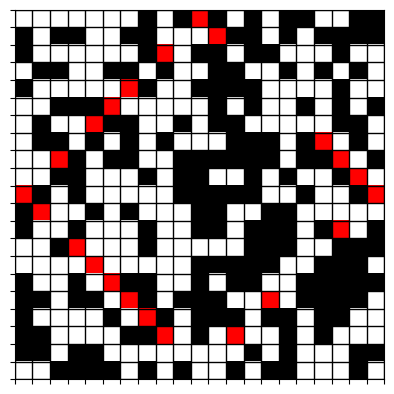

In [3]:
best_predicted_candidate = unsmoothed_candidates_df[unsmoothed_candidates_df.mutant_scores == unsmoothed_candidates_df.mutant_scores.max()].mutant_sequences.values[0]
plot_sequence(best_predicted_candidate)

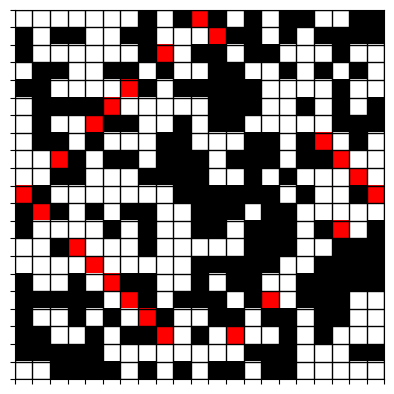

In [4]:
best_predicted_candidate = smoothed_candidates_df[smoothed_candidates_df.mutant_scores == smoothed_candidates_df.mutant_scores.max()].mutant_sequences.values[0]
plot_sequence(best_predicted_candidate)

In [58]:
candidates = candidates_df.mutant_sequences
fitness(candidates[0])

30.793155220332

In [59]:
fitnesses = []
for c in candidates:
    fitnesses.append(fitness(c))

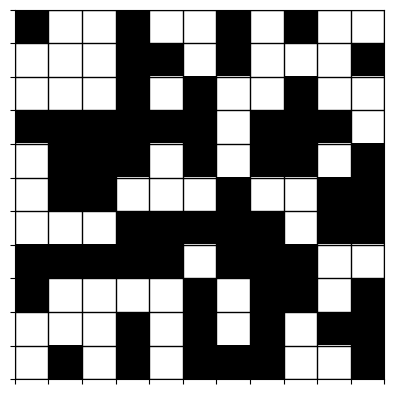

In [72]:
#max_seq = candidates_df[candidates_df.mutant_scores == candidates_df.mutant_scores.max()].mutant_sequences.values[0]
plot_sequence(starting_seq)

In [13]:
landscape_data = []
seen_set = set()
# Sample 100k binary vectors and compute their fitnesses
while len(landscape_data) < 1e5:
    # Generate random binary vector
    vector = np.random.randint(2, size=n*n)
    seq = ''.join(map(str, vector.astype(int)))
    if seq in seen_set:
        continue
    seen_set.add(seq)
    # Compute fitness
    fitness_value = fitness(vector)
    
    # Convert vector to string for easier storage and retrieval
    sequence = ''.join(map(str, vector))
    if len(landscape_data) % 5000 == 0:
        print(len(landscape_data))
    # Append sequence and fitness to data
    landscape_data.append([sequence, fitness_value])

0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000


In [14]:
landscape_df = pd.DataFrame(landscape_data, columns=['sequence', 'target'])
starting_seq = landscape_df[landscape_df.target == landscape_df.target[1:].median()].sequence.values[0]

In [15]:
starting_seq

'000000010111010110011101100110001110101111100000011111011000100011001101001100101010110000110111110000100011111000001110010101010011100101100000111011010001100111011010001101101111111011101001100011110010100110110100100111111010011111010110011101100000100101010011011101101001100010000011100111000010000011111001111100101110010111011111110110110111011011100101101011001101101100110000111010100101000110110000000011100011101111010101101100010'

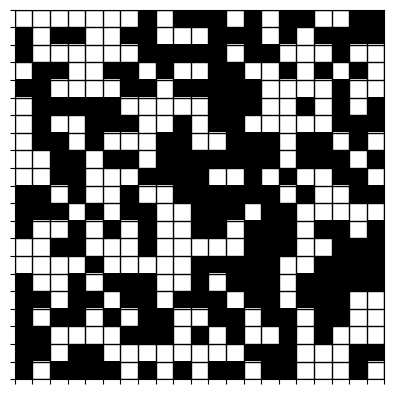

In [16]:
plot_sequence(starting_seq)

In [5]:
# Initialize list to hold sequences and their targets
data = []
seen_set = set()
# Sample 100k binary vectors and compute their fitnesses
while len(data) < 1e5:
    # Generate random binary vector
    vector = np.random.randint(2, size=n*n)
    seq = ''.join(map(str, vector.astype(int)))
    if seq in seen_set:
        continue
    seen_set.add(seq)
    # Compute fitness
    fitness_value = fitness(vector)
    
    # Convert vector to string for easier storage and retrieval
    sequence = ''.join(map(str, vector))
    
    # Append sequence and fitness to data
    data.append([sequence, fitness_value])

# Create a DataFrame
df = pd.DataFrame(data, columns=['sequence', 'target'])

KeyboardInterrupt: 

In [17]:
data = []
while len(data) < 5e3:
    # Start from the known sequence
    vector = np.array(list(map(int, starting_seq)))

    # Draw k from a Poisson distribution
    k = np.random.poisson(3)
    
    # Randomly choose k positions to flip
    positions_to_flip = np.random.choice(n*n, k, replace=False)
    for pos in positions_to_flip:
        vector[pos] = 1 - vector[pos]  # Flip the bit
        
    seq = ''.join(map(str, vector.astype(int)))
    if seq in seen_set:
        continue
    seen_set.add(seq)
    
    # Compute fitness
    fitness_value = fitness(vector)
    
    # Append sequence and fitness to data
    data.append([seq, fitness_value])

# Create a DataFrame
df = pd.DataFrame(data, columns=['sequence', 'target'])

In [18]:
df.head()

,sequence,target
0,0000000101111101100111011001100011101011111000...,123.873405
1,0000000101110101100111011001100011101011111000...,129.442581
2,0000000101100101100111011001100011101011111000...,122.954588
3,0000000101110101100111011001100011101011111000...,125.125911
4,0000000101110101100111011001100011101011111000...,118.112140


In [19]:
df['augmented'] = [0]*df.shape[0]

In [20]:
df.to_csv('../data/Diamond/ground_truth.csv', index = False)

In [80]:
from polyleven import levenshtein
df['hamming_dist'] = df['sequence'].apply(lambda seq: levenshtein(seq, starting_seq))

(array([ 82., 355., 262., 161.,   0.,  84.,  33.,  19.,   3.,   1.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

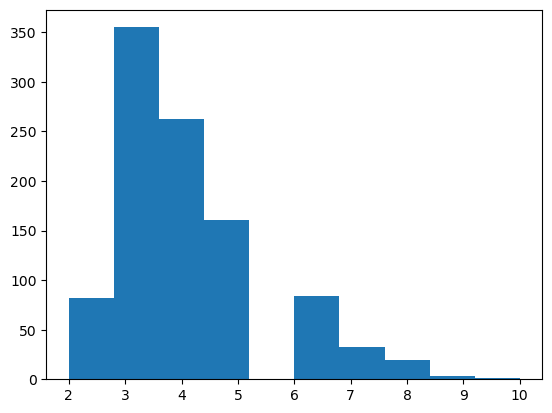

In [53]:
plt.hist(df.hamming_dist)

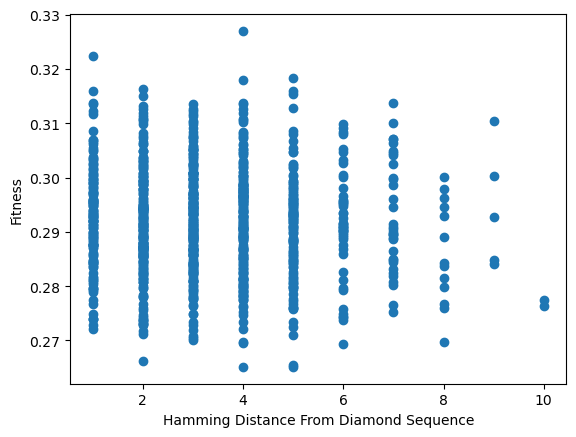

In [81]:
plt.scatter(df.hamming_dist, df.target)
plt.xlabel("Hamming Distance From Diamond Sequence")
plt.ylabel("Fitness")
plt.show()

In [192]:
gfp_wt = 'SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK'
gt_gfp = pd.read_csv('/home/gridsan/akirjner/protein_design/GGS/data/GFP/ground_truth.csv')
gt_gfp['hamming_dist'] = gt_gfp['sequence'].apply(lambda seq: levenshtein(seq, gfp_wt))

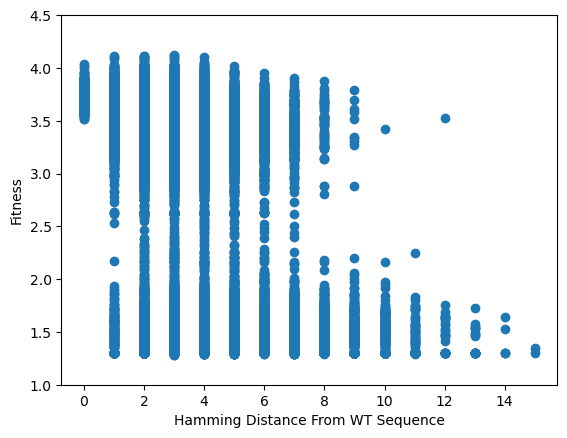

In [195]:
plt.scatter(gt_gfp.hamming_dist, gt_gfp.target)
plt.xlabel("Hamming Distance From WT Sequence")
plt.ylabel("Fitness")
plt.ylim(1, 4.5)
plt.show()

In [85]:
max_seq = df[df.target == df.target.max()].sequence.values[0]

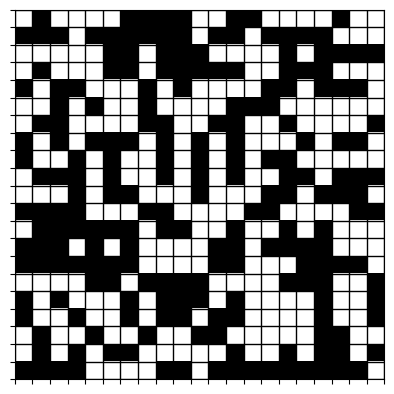

In [86]:
plot_sequence(max_seq)

In [83]:
best_seq = generate_diamond_sequence(n)
fitness(best_seq)

0.5460170452218472

In [84]:
df.target.max()

0.3269845911826503

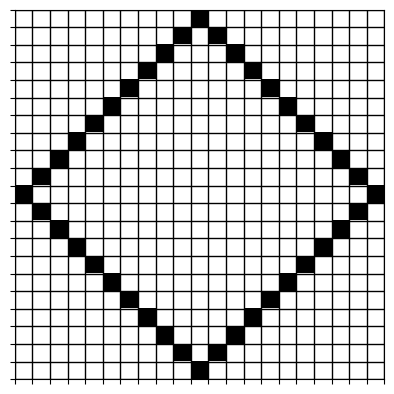

In [87]:
plot_sequence(best_seq)